# ASTR 596: FDS Homework 5: Hunting for Exoplanets (Due April 1 at Noon)


### The Kepler satellite has discovered many multi-planet systems. You can download artwork for some of them even at the [Exoplanet Travel Bureau](https://exoplanets.nasa.gov/alien-worlds/exoplanet-travel-bureau/)

<img src="Kepler-186f_small.jpg" width="500">


### But is there a system like our own Solar system with 8 planets (sorry Pluto)? In fact, there may be at least one - [Kepler 90](https://www.nytimes.com/2017/12/14/science/eight-planets-star-system.html). This along with most other Kepler planets, were not discovered through radial velocity measurements like our example in class (i.e. that nice parameteric model doesn't apply), but were rather discovered through transits - dips in the light of the star as the planet moves around it.


<img src="Transiting-Exoplanet-Light-Curve.gif">

### You get to find 3 exoplanets in the Kepler-90 system with the techniques in class. 


### To get and analyze the Kepler data, you'll need the `lightkurve` package

> `python -m pip install lightkurve --upgrade`

### I've included some code to get the light curve, clean it and remove the NaNs, and some outliers (you can judge the wisdom of strong outlier removal when you are hunting for planets), and bin the light curve a little bit in time.


<hr>

#### Hints:


* `lightkurve` has a bunch of useful [tutorials](https://docs.lightkurve.org/index.html), in particular [this one](https://docs.lightkurve.org/tutorials/3-science-examples/periodograms-creating-periodograms.html)

* once you get to a periodogram with `lightkurve`, `find_peaks` in `scipy` can help identify the exoplanet peaks

* You might find it easier to remove the signal of each planet as you find it and work with the residual light curve to find the next. This isn't strictly necessary if you do the previous steps well, but can be helpful. The tutorials page has a demo.

* [The Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html) might be of help

<hr>

# Happy (planet) hunting!

In [2]:
%matplotlib inline
# %pylab
import numpy as np
import astropy.table as at
import astropy.units as u
import matplotlib.pyplot as plt
import lightkurve as lk
from scipy.signal import find_peaks, find_peaks_cwt

In [3]:
### RUN THIS
lcfs = lk.search_lightcurve('Kepler-90', mission='Kepler').download_all()

In [15]:
### RUN THIS
def squelch_rednoise(lc):
    corrected_lc = lc.remove_outliers(sigma_upper=10, sigma_lower=10).normalize().flatten(window_length=51)
    return corrected_lc

In [64]:
with open('/home/berres2002/berre/Desktop/spring_23/astro596/data/clc.p','rb') as f:
    clc=pickle.load(f)
    f.close()

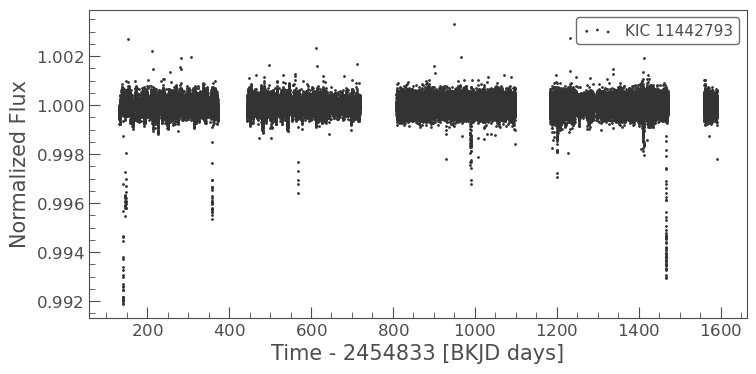

In [65]:
### RUN THIS - it will take a while.
# stitched_lc = lcfs.stitch(corrector_func=squelch_rednoise)
# clc = stitched_lc.remove_nans().bin(time_bin_size=15*u.min)
clc.scatter();

# This is the data we'll deal with

# Q1. First, calculate the periodogram using lightkurve. Use the `bls` method. Look for planets between 50 and 500 day periods with a grid spacing of 0.01d - this is coarse. Use `scipy.signal.find_peaks` to identify peaks in the periodogram. Remember to exclude any peaks arising from the Earth's revolution. Plot the periodogram and highlight the peak locations. (25 pts)


In [97]:
# YOUR CODE HERE
#DO NOT RUN TAKES A LONG TIME
from lightkurve import periodogram

l1=periodogram.BoxLeastSquaresPeriodogram.from_lightcurve(clc,period=np.arange(50,500,0.01))
l1p=l1.power

<AxesSubplot: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

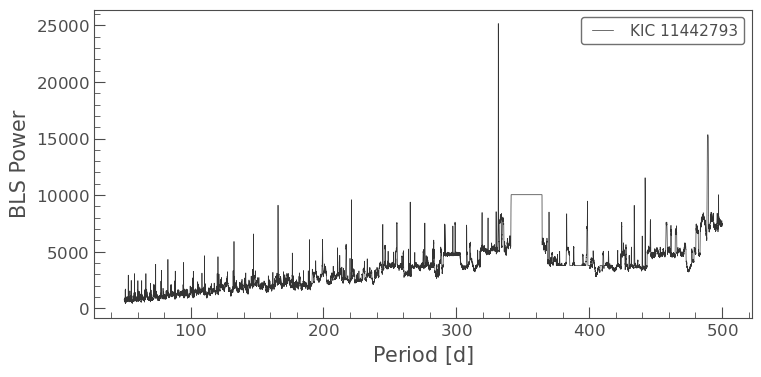

In [92]:
l1.plot()

In [265]:
ex=np.arange(50,500,0.01)
m1= (ex > 341.17) & (ex < 364.47)
# plt.plot(ex[~m1],l1p[~m1])

In [279]:
p1=find_peaks(l1p,prominence=(2000))
pm = ~((ex[p1[0]] > 341.17) & (ex[p1[0]] < 364.47))

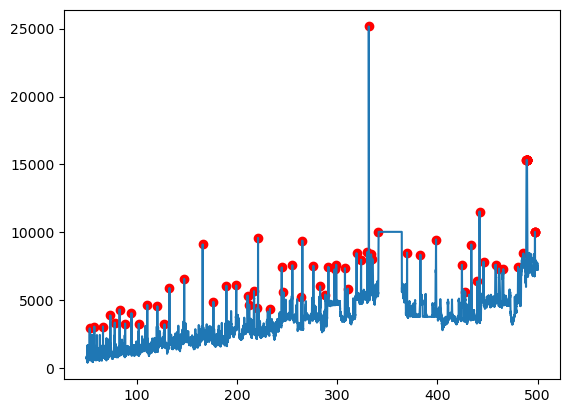

In [295]:
# p1[0].sid
plt.plot(np.arange(50,500,0.01),l1.power)
try:
    plt.scatter(ex[~m1][p1[0]],p1[1]['peak_heights'],c='r')
except:
    plt.scatter(ex[p1[0][pm]],l1p[p1[0][pm]],c='r')
mk = l1p !=l1p[p1[0][pm]]
pi = p1[0][pm]
pex =ex[mk]
powp = l1p[p1[0][pm]]

# Q2. a. The periodogram function from lightkurve can also get a transit time and peak power using `periodogram.transit_time` and `periodogram.power` - you'll want both. Get a sorted list of candidate periods, and print it sorted by peak power. (10 pts)

In [331]:
# YOUR CODE HERE
j=0
sper= l1[pi].period.value[np.argsort(powp)]
spow= np.sort(powp)
print('Period, Power')
for i in l1[pi].period.value[np.argsort(powp)]:
    print(i,' ',np.sort(powp)[j])
    j+=1
# j

Period, Power
53.049999999999386   2922.3477192556675
57.669999999998474   3055.1210721085095
66.31999999999675   3058.364200756052
127.67999999998453   3223.2375255287343
102.01999999998964   3264.8906612685714
88.41999999999236   3279.824313080672
78.01999999999443   3348.3585077461253
73.67999999999529   3877.8464536952633
94.7399999999911   4044.935489989756
82.88999999999345   4313.451713749397
232.91999999996358   4367.755032025393
219.9599999999662   4404.701693981672
120.56999999998594   4550.718210622914
110.51999999998796   4637.174659193865
212.2499999999677   4674.9330888296145
176.51999999997483   4879.94213817259
263.9499999999574   5232.650125252588
210.59999999996805   5342.17306946084
288.2699999999526   5413.200931437656
246.26999999996096   5572.634474361718
427.66999999992487   5624.401564643304
217.01999999996679   5663.541503288873
310.51999999994814   5850.04485079808
132.62999999998357   5897.311660877296
282.9999999999536   6021.180593797655
189.46999999997226 

# Q2. b. Next sort the list of periods from longest to shortest. Check if each period has a period in your list that is either 1/2 or 1/3 the same value. If it is, exclude it. If not keep it. Select the four periods with the highest power between 0 to 100d, 100d and 200d, 200d and 300d and 300d and 400d. (15 pts)

In [436]:
# YOUR CODE HERE.
w1 = sper.copy()
w1.sort()
w1c=np.ceil(w1)
fp = []
for i,val in enumerate(w1c):
    if val in w1c*2 or val in w1c*3:
        w1[i] = np.nan
    if w1[i] < 100:
        one = w1[i]
    if w1[i] < 200:
        two = w1[i]
    if w1[i] < 300:
        three = w1[i]
    if w1[i] < 400:
        four = w1[i]
w1

array([ 53.05,  57.67,  66.32,  73.68,  78.02,  82.89,  88.42,  94.74,
       102.02, 110.52, 120.57, 127.68, 132.63,    nan,    nan, 176.52,
          nan, 199.33, 210.6 , 212.25, 217.02, 219.96,    nan, 232.92,
       244.67, 246.27,    nan, 263.95,    nan, 276.29, 283.  , 288.27,
       291.19, 297.39, 299.02, 307.74, 310.52, 319.35, 323.87, 329.94,
          nan, 333.87, 335.03, 341.17, 369.76,    nan,    nan, 424.5 ,
       427.67, 433.88,    nan, 442.09, 446.07, 458.41, 461.56,    nan,
       480.56, 485.85, 488.93, 488.96, 488.99,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan])

In [437]:
fp = [one,two ,three, four]
fp

[94.7399999999911, 199.32999999997028, 299.01999999995047, 369.7599999999364]

# Q3. Select each peak period from the coarse grid in Q2.b. and then use lightkurve algorithm to refine the period within +/- 5 days, and get the best period. (25 pts)

In [412]:
# YOUR CODE HERE
wl = []
for i in range(4):
    wog=clc.to_periodogram(method='bls',minimum_period=fp[i]-5,maximum_period=fp[i]+5)
    wl.append(wog)

# Q4. Use lightkurve.fold to plot the folded light curve for each of the best periods in Q3. (25 pts)

91.05578745179439 d


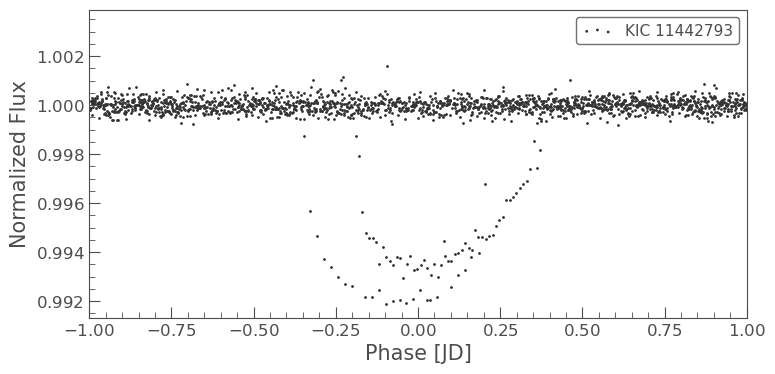

In [433]:
wog = wl[0]
wogp=wog.power
p2=find_peaks(wogp)[0]
pek=np.argmax(wogp[p2])
tt=wog[p2].transit_time_at_max_power
clc.fold(wog.period_at_max_power,wog.transit_time_at_max_power).scatter()
plt.xlim(-1,1)
print(wog.period[pek])

195.85772317790565 d


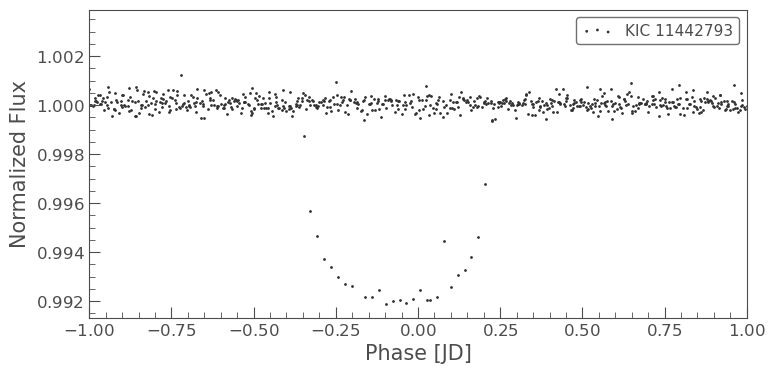

In [435]:
wog = wl[1]
wogp=wog.power
p2=find_peaks(wogp)[0]
pek=np.argmax(wogp[p2])
tt=wog[p2].transit_time_at_max_power
clc.fold(wog.period[pek],wog.transit_time_at_max_power).scatter()
plt.xlim(-1,1)
print(wog.period[pek])

295.34491412906635 d


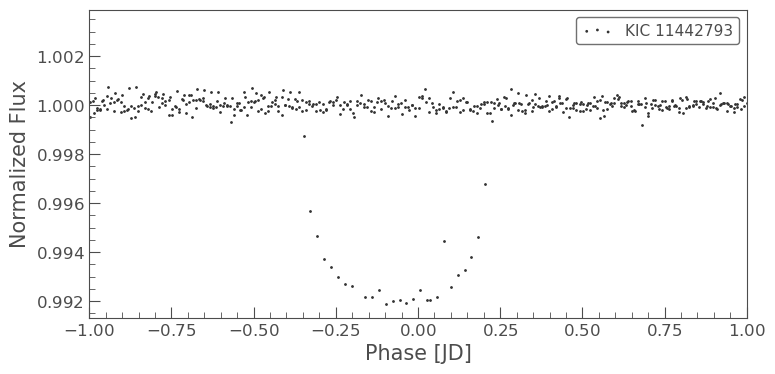

In [429]:
wog = wl[2]
wogp=wog.power
p2=find_peaks(wogp)[0]
pek=np.argmax(wogp[p2])
tt=wog[p2].transit_time_at_max_power
clc.fold(wog.period[pek],wog.transit_time_at_max_power).scatter()
plt.xlim(-1,1)
print(wog.period[pek])

365.9506423402893 d


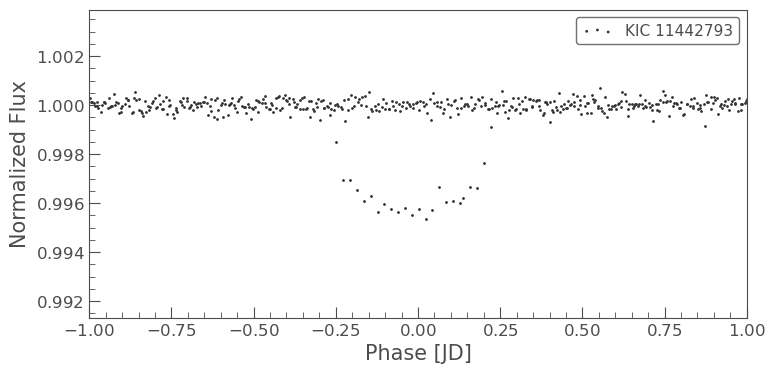

In [430]:
wog = wl[3]
wogp=wog.power
p2=find_peaks(wogp)[0]
pek=np.argmax(wogp[p2])
tt=wog[p2].transit_time_at_max_power
clc.fold(wog.period[pek],wog.transit_time_at_max_power).scatter()
plt.xlim(-1,1)
print(wog.period[pek])